In [1]:
# Note this analysis is based on the past 100 tweets per news org, therefore the trends observed are limited in scope.


# Observed Trends
# Trend 1: New York Times show the most negative Twitter sentiment amongst the five news organizations evaluated
# Trend 2: BBC and CBS are among the most positive when evaluating their last 100 tweets
# Trend 3: Fox is evaluated as having the most consistent neutral sentiment


In [2]:
# Dependencies
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
import matplotlib.pyplot as plt
from datetime import datetime
import pandas as pd
import datetime
import tweepy

# current date 
d = datetime.datetime.today()
now = (d.strftime('%m/%d/%Y'))


In [3]:
# Twitter API keys stored in 'twitter_creds.py'
# Four keys: consumer_key, consumer_secret, access_token, access_token_secret
# If the user does not have a twitter_creds file saved please define the above four tokens and comment out the line below
from twitter_creds import *

# Defining API access
def start_twitter():
    auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_token, access_token_secret)
    api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())
    return api


In [4]:
# Define news oranizations being evaluated
news_orgs = ['BBC','CBS','CNN','FoxNews','nytimes']

In [5]:
# start_twitter functional placed in pull_tweets
pull_tweets = start_twitter()

# Outline blank lists for future dataframe build
tw_screen_name = []    #screen_name / under 'user'
tw_text = []           #text of tweet
tw_created_time = []   #created_at 

# Loop through all of the news organizations
for org in news_orgs:
    for x in range(5): #bypass 20 results per page with a range of 5 to gather last 100 results
        try:
            tweets = pull_tweets.user_timeline(screen_name=org,page=x)
            for tweet in tweets:
                if tweet['user']['lang'] == 'en':
                    tw_created_time.append(tweet['created_at'])
                    tw_text.append(tweet['text'])
                    tw_screen_name.append(tweet['user']['screen_name'])
        except:
            continue
            

In [6]:
# correct format of Time in DF
n = len(tw_created_time)
tweet_times = []
for x in range(n):
    tw_time = datetime.datetime.strptime(tw_created_time[x], "%a %b %d %H:%M:%S %z %Y")
    tweet_times.append(tw_time)

# Create dictionary of values
twitter_dict = {"Screen Name" :tw_screen_name,"Text": tw_text,"Time": tweet_times}

# Create DF from dictionary
twitter_df = pd.DataFrame(twitter_dict)

# Calculate number of characters per tweeted text and add to DF
twitter_df['Length'] = twitter_df['Text'].str.len()


In [7]:
# Evaluate sentiment using Vader
sentim = []
for sent in tw_text:
    compound = analyzer.polarity_scores(sent)["compound"]
    sentim.append(compound)
# Insert compound results in to DF
twitter_df['Sentiment'] = sentim

In [8]:
# Individual DF for each news org  for scatter plot
fox = twitter_df.loc[twitter_df['Screen Name'] == 'FoxNews']
bbc = twitter_df.loc[twitter_df['Screen Name'] == 'BBC']
cbs = twitter_df.loc[twitter_df['Screen Name'] == 'CBS']
cnn = twitter_df.loc[twitter_df['Screen Name'] == 'CNN']
nyt = twitter_df.loc[twitter_df['Screen Name'] == 'nytimes']

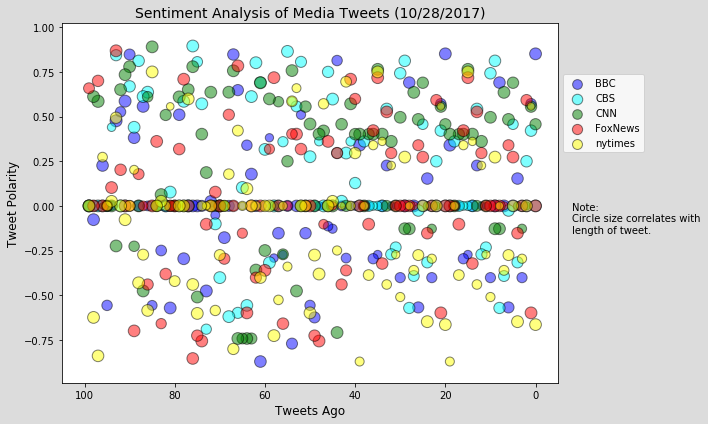

In [9]:
big, ax = plt.subplots(figsize = (8,6),facecolor='gainsboro')
fc = fox['Screen Name'].count()
plt.scatter(x = range(0,fc),y=fox['Sentiment'], marker='o', facecolors="blue", edgecolors="black", 
            linewidth='1',s=fox['Length'], alpha=0.50)

bbc_c = bbc['Screen Name'].count()
plt.scatter(x = range(0,bbc_c),y=bbc['Sentiment'], marker='o', facecolors="aqua", edgecolors="black", 
            linewidth='1',s=bbc['Length'], alpha=0.50)

cbs_c = cbs['Screen Name'].count()
plt.scatter(x = range(0,cbs_c),y=cbs['Sentiment'], marker='o', facecolors="green", edgecolors="black", 
            linewidth='1',s=cbs['Length'], alpha=0.50)

cnn_c = cnn['Screen Name'].count()
plt.scatter(x = range(0,cnn_c),y=cnn['Sentiment'], marker='o', facecolors="red", edgecolors="black", 
            linewidth='1',s=cnn['Length'], alpha=0.50)

nyt_c = nyt['Screen Name'].count()
plt.scatter(x = range(0,nyt_c),y=nyt['Sentiment'], marker='o', facecolors="yellow", edgecolors="black", 
            linewidth='1',s=nyt['Length'], alpha=0.50)

#plt.legend(news_orgs, loc="best")

plt.legend(news_orgs,loc='center left', bbox_to_anchor=(1, 0.75))
plt.title("Sentiment Analysis of Media Tweets (" + now + ")", fontsize = 14)
plt.xlabel("Tweets Ago", fontsize=12)
plt.ylabel("Tweet Polarity", fontsize=12)
plt.xlim(105, -5)
plt.figtext(1,0.45,"Note:\nCircle size correlates with\nlength of tweet.")
plt.tight_layout()
plt.show()
big.savefig('Media_Sentiment_by_Tweet.png',bbox_inches='tight')

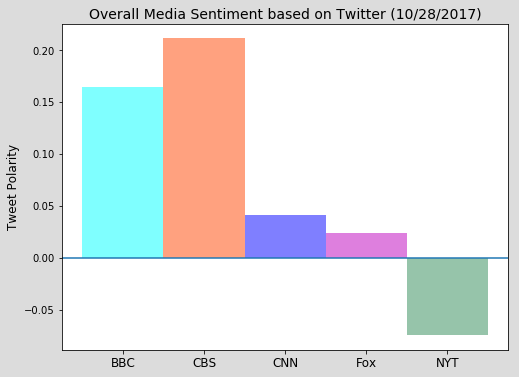

In [10]:
# Define mean sentiment values by each News Org
bbc_ = twitter_df.loc[twitter_df['Screen Name'] == 'BBC']
bbc_mean = bbc_['Sentiment'].mean()

cbs_ = twitter_df.loc[twitter_df['Screen Name'] == 'CBS']
cbs_mean = cbs_['Sentiment'].mean()

cnn_ = twitter_df.loc[twitter_df['Screen Name'] == 'CNN']
cnn_mean = cnn_['Sentiment'].mean()

fox_ = twitter_df.loc[twitter_df['Screen Name'] == 'FoxNews']
fox_mean = fox_['Sentiment'].mean()

nyt_ = twitter_df.loc[twitter_df['Screen Name'] == 'nytimes']
nyt_mean = nyt_['Sentiment'].mean()

# Setting up bar chart
fig, ax = plt.subplots(facecolor='gainsboro', figsize = (8,6))
colors = ['aqua','orangered','b','m','seagreen']
mean_values = [bbc_mean,cbs_mean,cnn_mean,fox_mean,nyt_mean]
bar_labels = ['BBC','CBS','CNN','Fox','NYT']
x_pos = list(range(len(bar_labels)))

plt.bar(x_pos,mean_values,width=1,align = 'center',color = colors,alpha=0.5)

plt.title("Overall Media Sentiment based on Twitter (" + now + ")", fontsize = 14)
plt.ylabel("Tweet Polarity", fontsize=12)
plt.xticks(x_pos, bar_labels, fontsize = 12)
plt.axhline(y=0)
plt.show()
fig.savefig('Overall_Media_Sentiment.png')